In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tikzplotlib
# plt.style.use(['science','bright'])
# plt.style.use(['fivethirtyeight'])
# plt.style.use(['seaborn-paper'])
# plt.style.use(['ggplot'])
plt.style.use(['default'])
plt.rcParams['text.usetex'] = True
# plt.rcParams['font.size'] = 15
plt.rcParams["font.family"] = "Times New Roman"

from os import path
import pickle
import itertools
from functools import partial
import pprint
pp = pprint.PrettyPrinter(indent=4)

from util import get_loader

In [2]:
loader = get_loader()

'''NOTES:
exp = loader.find_by_id(2)
len(qs)
qs[0].to_dict()
exp.metrics.keys()
loader.find_latest().to_dict()
'''

'NOTES:\nexp = loader.find_by_id(2)\nlen(qs)\nqs[0].to_dict()\nexp.metrics.keys()\nloader.find_latest().to_dict()\n'

In [3]:
pd.set_option('display.max_columns', 500)  # or 1000
pd.set_option('display.max_rows', 500)  # or 1000

In [4]:
dataset_names = {'phishing-websites':'phishing',
                 'speed-dating':'speed',
                 'bank-marketing':'bank',
                }

# Datasets

In [15]:
# loader.find_latest().to_dict()
version = 15

query = {"$and": [
    {"status": 'COMPLETED'},
    {"config.ver": version},
    {"config.iter": 1},
    {"config.prefix": ''},
    {"config.criterion": 'entropy'},
    {"config.costtype": 'unit'},
#     {"config.tradeoff": 1},
#     {"_id": 9},
#     {"config.dup_times": 1},
#     {"config.dataset": "dota"}
        ]}
qs = loader.find(query)
df = qs.project(on=[
    'config.dataset',
    
    'info.n',
    'info.nvar',
    'info.ncls',
    ])


df = df.sort_values(by=['n','nvar','ncls'])
df

,dataset,n,nvar,ncls
exp_id,,,,
6269,iris,150,20,3
6301,ilpd,583,46,2
6291,breast-w,699,45,2
6296,tic-tac-toe,958,27,2
6302,phoneme,5404,25,2


In [16]:
df.values

array([['iris', 150, 20, 3],
       ['ilpd', 583, 46, 2],
       ['breast-w', 699, 45, 2],
       ['tic-tac-toe', 958, 27, 2],
       ['phoneme', 5404, 25, 2]], dtype=object)

# Comparison

## Best trade

In [ ]:
# loader.find_latest().to_dict()
# version = 11
# version = 12
# version = 13
# version = 15
version = 16
costtype = 'unit'
# costtype = 'random'

query = {"$and": [
    {"status": 'COMPLETED'},
    {"config.ver": version},
#     {"config.costtype": 'unit'},
    {"config.costtype": costtype},
#     {'config.prefix': 'spc'},
    {'config.prefix': {"$in": ['ep']}},
#     {"_id": 9},
#     {"config.dup_times": 1},
#     {"config.dataset": "iris"}
        ]}
qs = loader.find(query)
df = qs.project(on=[
    'config.ver',
    'config.iter',
    'config.dataset',
    'config.costtype',
    'config.rn',
    'config.prefix',
    'config.criterion',
    'config.tradeoff',
    
    'info.n',
    'info.nvar',
    'info.ncls',
    'info.auc',
    'info.cost',
    'info.auc2',
    'info.cost2',
    'info.best_ccp_alpha',
    'config.ccp_alphas',
    'info.ccp_aucs',
    'info.ccp_cost',
    'info.runtime',
    'info.best_trade',
    'info.trade_aucs',
    'info.trade_cost',
    ])

df['name'] = df['prefix']+df['criterion']
# df = df.drop(columns=['prefix', 'criterion'])
# df = df.sort_values(by=['rn','dataset','costtype','name'])
df['dataset'].replace(dataset_names, inplace=True)
df = df.sort_values(by=['rn','dataset','name'])
df.groupby(['rn','dataset','criterion', 'prefix'])['ver'].count()

In [45]:
df[df['criterion'] == 'gini']

,ver,iter,dataset,costtype,rn,prefix,criterion,tradeoff,n,nvar,ncls,auc,cost,auc2,cost2,best_ccp_alpha,ccp_alphas,ccp_aucs,ccp_cost,runtime,best_trade,trade_aucs,trade_cost,name
exp_id,,,,,,,,,,,,,,,,,,,,,,,,
11031.0,16,1,bank,unit,42,ep,gini,"(0.01, 0.1, 1, 10, 100)",45211,76,2,0.858937,8.149493,0.850157,5.686827,0.00001,"(1e-05, 0.0001, 0.001, 0.01, 0.1, 1)","(0.8652446670278175, 0.8077374029722961, 0.5, ...","(5.686826555439601, 2.1884854804558214, 0.0, 0...",221.740165,100.0,"(0.8692957749146687, 0.8472254054422645)","(8.149492842921918, 8.15808765443606)",epgini
11024.0,16,1,bioresponse,unit,42,ep,gini,"(0.01, 0.1, 1, 10, 100)",3751,5333,2,0.768556,7.790476,0.767967,7.522667,0.00010,"(1e-05, 0.0001, 0.001, 0.01, 0.1, 1)","(0.7517900103104594, 0.7563437965402682, 0.726...","(7.790476190476041, 7.5226666666665825, 0.9999...",3819.320715,100.0,"(0.6828244930690802, 0.6583944323519302)","(4.931558935361212, 5.3307984790874485)",epgini
11036.0,16,1,breast-w,unit,42,ep,gini,"(0.01, 0.1, 1, 10, 100)",699,45,2,0.950408,4.419223,0.950408,4.419223,0.00001,"(1e-05, 0.0001, 0.001, 0.01, 0.1, 1)","(0.9433876811594203, 0.9433876811594203, 0.920...","(4.419222903885485, 4.419222903885485, 2.99182...",1.040579,1.0,"(0.9139492753623188, 0.9375, 0.943387681159420...","(4.312883435582818, 4.543967280163605, 4.41922...",epgini
11042.0,16,1,covertype,unit,42,ep,gini,"(0.01, 0.1, 1, 10, 100)",581012,94,7,0.914436,8.533844,0.913999,8.162279,0.00001,"(1e-05, 0.0001, 0.001, 0.01, 0.1, 1)","(0.9154288353415502, 0.9021275257544071, 0.5, ...","(8.162278987074275, 5.225403054277907, 0.0, 0....",1403.338135,10.0,"(0.9156433404421559, 0.9100385789374632, 0.836...","(9.23235229033109, 8.523493398244076, 8.217206...",epgini
11038.0,16,1,default,unit,42,ep,gini,"(0.01, 0.1, 1, 10, 100)",30000,112,2,0.704621,9.529762,0.704370,7.104714,0.00001,"(1e-05, 0.0001, 0.001, 0.01, 0.1, 1)","(0.69840642535897, 0.6425230029707872, 0.5, 0....","(7.104714285713722, 1.0000000000002534, 0.0, 0...",159.714092,100.0,"(0.6960690579097211, 0.6329085606123124)","(9.529761904761441, 8.565619047620784)",epgini
11028.0,16,1,diabetic,unit,42,ep,gini,"(0.01, 0.1, 1, 10, 100)",101766,264,3,0.609315,8.627220,0.611071,7.375770,0.00001,"(1e-05, 0.0001, 0.001, 0.01, 0.1, 1)","(0.6001264914297221, 0.5, 0.5, 0.5, 0.5, 0.5)","(7.3757703376144965, 0.0, 0.0, 0.0, 0.0, 0.0)",2580.077058,100.0,"(0.5764183176321384, 0.5456512058221596)","(8.625491297023817, 8.171532846716072)",epgini
11034.0,16,1,iris,unit,42,ep,gini,"(0.01, 0.1, 1, 10, 100)",150,20,3,0.945000,3.228571,0.945000,3.228571,0.00001,"(1e-05, 0.0001, 0.001, 0.01, 0.1, 1)","(1.0, 1.0, 1.0, 1.0, 0.5, 0.5)","(3.228571428571426, 3.228571428571426, 3.22857...",0.100925,1.0,"(0.9500000000000001, 1.0, 1.0, 0.85)","(2.7999999999999985, 3.0095238095238077, 3.228...",epgini
11039.0,16,1,letter,unit,42,ep,gini,"(0.01, 0.1, 1, 10, 100)",20000,80,26,0.949501,8.434071,0.949059,7.917500,0.00010,"(1e-05, 0.0001, 0.001, 0.01, 0.1, 1)","(0.9458325463225262, 0.9462609843311832, 0.913...","(8.33428571428629, 7.917500000000579, 5.134071...",89.184625,100.0,"(0.9459661183676435, 0.9109750457553224)","(8.43407142857196, 8.204071428572469)",epgini
11027.0,16,1,musk,unit,42,ep,gini,"(0.01, 0.1, 1, 10, 100)",6598,830,2,0.927270,7.037246,0.926788,6.899091,0.00001,"(1e-05, 0.0001, 0.001, 0.01, 0.1, 1)","(0.9509716072809054, 0.9440754796542273, 0.746...","(6.899090515374974, 5.7516240796883, 1.3098744...",416.740418,100.0,"(0.95221027479092, 0.9021716213367067)","(7.037245560849177, 6.99740147249882)",epgini


## Load

In [345]:
# loader.find_latest().to_dict()
# version = 11
# version = 12
# version = 13
# version = 15
version = 16
costtype = 'unit'
# costtype = 'random'

query = {"$and": [
    {"status": 'COMPLETED'},
    {"config.ver": version},
    {"config.costtype": costtype},
#     {'config.prefix': 'spc'},
#     {'config.prefix': {"$in": ['ep','ep0','spc']}},
#     {"_id": 9},
#     {"config.dup_times": 1},
#     {"config.dataset": "iris"}
        ]}
qs = loader.find(query)
df = qs.project(on=[
    'config.ver',
    'config.iter',
    'config.dataset',
    'config.costtype',
    'config.rn',
    'config.prefix',
    'config.criterion',
    'config.tradeoff',
    
    'info.n',
    'info.nvar',
    'info.ncls',
    'info.auc',
    'info.cost',
    'info.auc2',
    'info.cost2',
    'info.best_ccp_alpha',
    'config.ccp_alphas',
    'info.ccp_aucs',
    'info.ccp_cost',
    'info.runtime',
    ])

df['name'] = df['prefix']+df['criterion']
# df = df.drop(columns=['prefix', 'criterion'])
# df = df.sort_values(by=['rn','dataset','costtype','name'])
df['dataset'].replace(dataset_names, inplace=True)
df = df.sort_values(by=['rn','dataset','name'])
df.groupby(['rn','dataset','criterion', 'prefix'])['ver'].count()

rn    dataset      criterion  prefix
42    bank         entropy              1
                              b         1
                              ep        1
                              ep0       1
                   gini                 1
                                       ..
2021  tic-tac-toe  entropy    ep0       1
                   gini                 1
                              ep        1
                   subm       sc        1
                              spc       1
Name: ver, Length: 774, dtype: int64

In [478]:
# df[df['dataset']=='dota2'].groupby(['rn','dataset','criterion'])['ver'].count()

In [477]:
# df[df['dataset']=='iris'].sort_values(by=['rn','prefix','criterion'])
# df[df['dataset'].isin(['dota2'])].sort_values(by=['iter','prefix','criterion'])[['dataset','iter','prefix','criterion']]

In [346]:
df2 = df.pivot_table(index=['dataset','rn'], columns='name', values=['auc','cost','auc2','cost2','runtime'])
cols = pd.MultiIndex.from_product([['auc','cost','auc2','cost2','runtime'],
                                   ['entropy' if costtype=='unit' else 'centropy',
                                    'epentropy', 
                                    'gini' if costtype=='unit' else 'cgini',
                                    'epgini', 
                                    'ep0entropy',
                                    'spcsubm', 'bentropy'
                                   ]])
df2 = df2[cols]
cols = pd.MultiIndex.from_product([['ROC AUC','Cost','ROC AUC (ccp)','Cost (ccp)','Runtime'],
                                   ['C4.5' if costtype=='unit' else 'CC4.5',
                                    'EC4.5',
                                    'CART' if costtype=='unit' else 'CCART',
                                    'ECART',
                                    'ASR',
                                    'IP','Bal',
                                   ]])
df2.columns = cols
# df2.fillna(0, inplace=True)
cols = pd.MultiIndex.from_product([['ROC AUC (ccp)','Cost (ccp)'],
                                   ['ASR','IP','Bal',]])
df2.loc[:,cols] = np.nan # pd.NA
df2.groupby('dataset').mean()

ROC AUC                                                    \
                 C4.5     EC4.5      CART     ECART       ASR        IP   
dataset                                                                   
bank         0.897834  0.874647  0.899850  0.860747  0.834065  0.855202   
bioresponse  0.747969  0.767715  0.742571  0.766073  0.754778  0.757020   
breast-w     0.942754  0.947758  0.936141  0.947509  0.954688  0.948981   
covertype    0.945313  0.916533  0.944080  0.917318  0.848372  0.835172   
default      0.699991  0.717587  0.698888  0.705811  0.638023  0.681492   
diabetic     0.632339  0.611578  0.630964  0.610370  0.564986  0.569121   
dota2        0.552002  0.534855  0.556627  0.534855  0.534695  0.534997   
electricity  0.817044  0.806567  0.815470  0.806567  0.806298  0.804139   
firewall     0.946090  0.950280  0.946090  0.950280  0.950280  0.945758   
ilpd         0.529022  0.528207  0.525124  0.510737  0.517931  0.514989   
iris         0.945000  0.957000  0.945000  0.957000  0.933833  0.938333   
letter       0.959188  0.956326  0.959222  0.945474  0.882100  0.928720   
musk         0.957262  0.937173  0.961903  0.925721  0.907016  0.946439   
obesity      0.933344  0.940772  0.930496  0.932185  0.904429  0.925042   
phishing     0.984896  0.973436  0.983284  0.978625  0.951221  0.975835   
phoneme      0.803093  0.815406  0.798711  0.810175  0.805957  0.800090   
shoppers     0.799800  0.849363  0.809192  0.851248  0.718704  0.826267   
spambase     0.920957  0.927775  0.918836  0.915848  0.882062  0.882457   
speed        0.744924  0.751240  0.729087  0.744509  0.640672  0.705158   
tic-tac-toe  0.935367  0.953493  0.939379  0.957827  0.882519  0.947964   

                            Cost                                            \
                  Bal       C4.5      EC4.5       CART     ECART       ASR   
dataset                                                                      
bank         0.824304  13.150232   8.245344  18.692773  8.072986  8.110905   
bioresponse       NaN  12.030019   7.824457  16.111543  7.811886  7.875886   
breast-w     0.970811   3.662577   3.983231   4.513701  4.215133  4.240082   
covertype    0.843646  12.811080   9.247226  14.517318  8.952649  8.265283   
default      0.667648  18.040419   9.988438  19.931981  9.457657  8.540619   
diabetic     0.565388  17.551583   8.636224  17.830409  8.641362  8.176789   
dota2        0.535006  29.603068   9.145354  28.085247  9.145354  9.145354   
electricity  0.801348  10.337327   8.405057  10.950342  8.405057  8.405057   
firewall     0.947367   3.360162   3.311609   3.360162  3.311609  3.311609   
ilpd         0.509709   7.310565   6.406388   7.604914  6.358722  6.551351   
iris         0.925167   2.563810   3.196190   2.554286  3.177143  4.093333   
letter       0.901861   9.835014   8.722757  11.928129  8.437014  8.229657   
musk         0.838284   7.015721   6.650671   7.994846  7.010871  7.326895   
obesity      0.898480   8.131754   7.501016   8.923494  7.517536  7.602979   
phishing     0.918885   6.498889   6.186637   6.638537  6.653037  7.137116   
phoneme      0.820802   7.372448   6.352195   8.176467  6.704918  6.458964   
shoppers     0.673752  15.950967   8.496142  24.799004  8.511250  8.281520   
spambase     0.874379  13.670000  10.188012  18.320994  9.794410  9.024037   
speed        0.590986   8.743622   7.567121  15.682196  7.834754  7.942428   
tic-tac-toe  0.818137   4.844478   4.862090   4.815821  4.895522  5.931940   

                                  ROC AUC (ccp)                                \
                   IP         Bal          C4.5     EC4.5      CART     ECART   
dataset                                                                         
bank         8.229936   29.713363      0.901538  0.874584  0.906445  0.851543   
bioresponse  7.625219         NaN      0.747969  0.768195  0.758761  0.760012   
breast-w     3.466258   23.131288      0.961821  0.953012  0.927446  0.943614   
coverty

## Plot

<ipython-input-350-eba8ad588f2d>:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


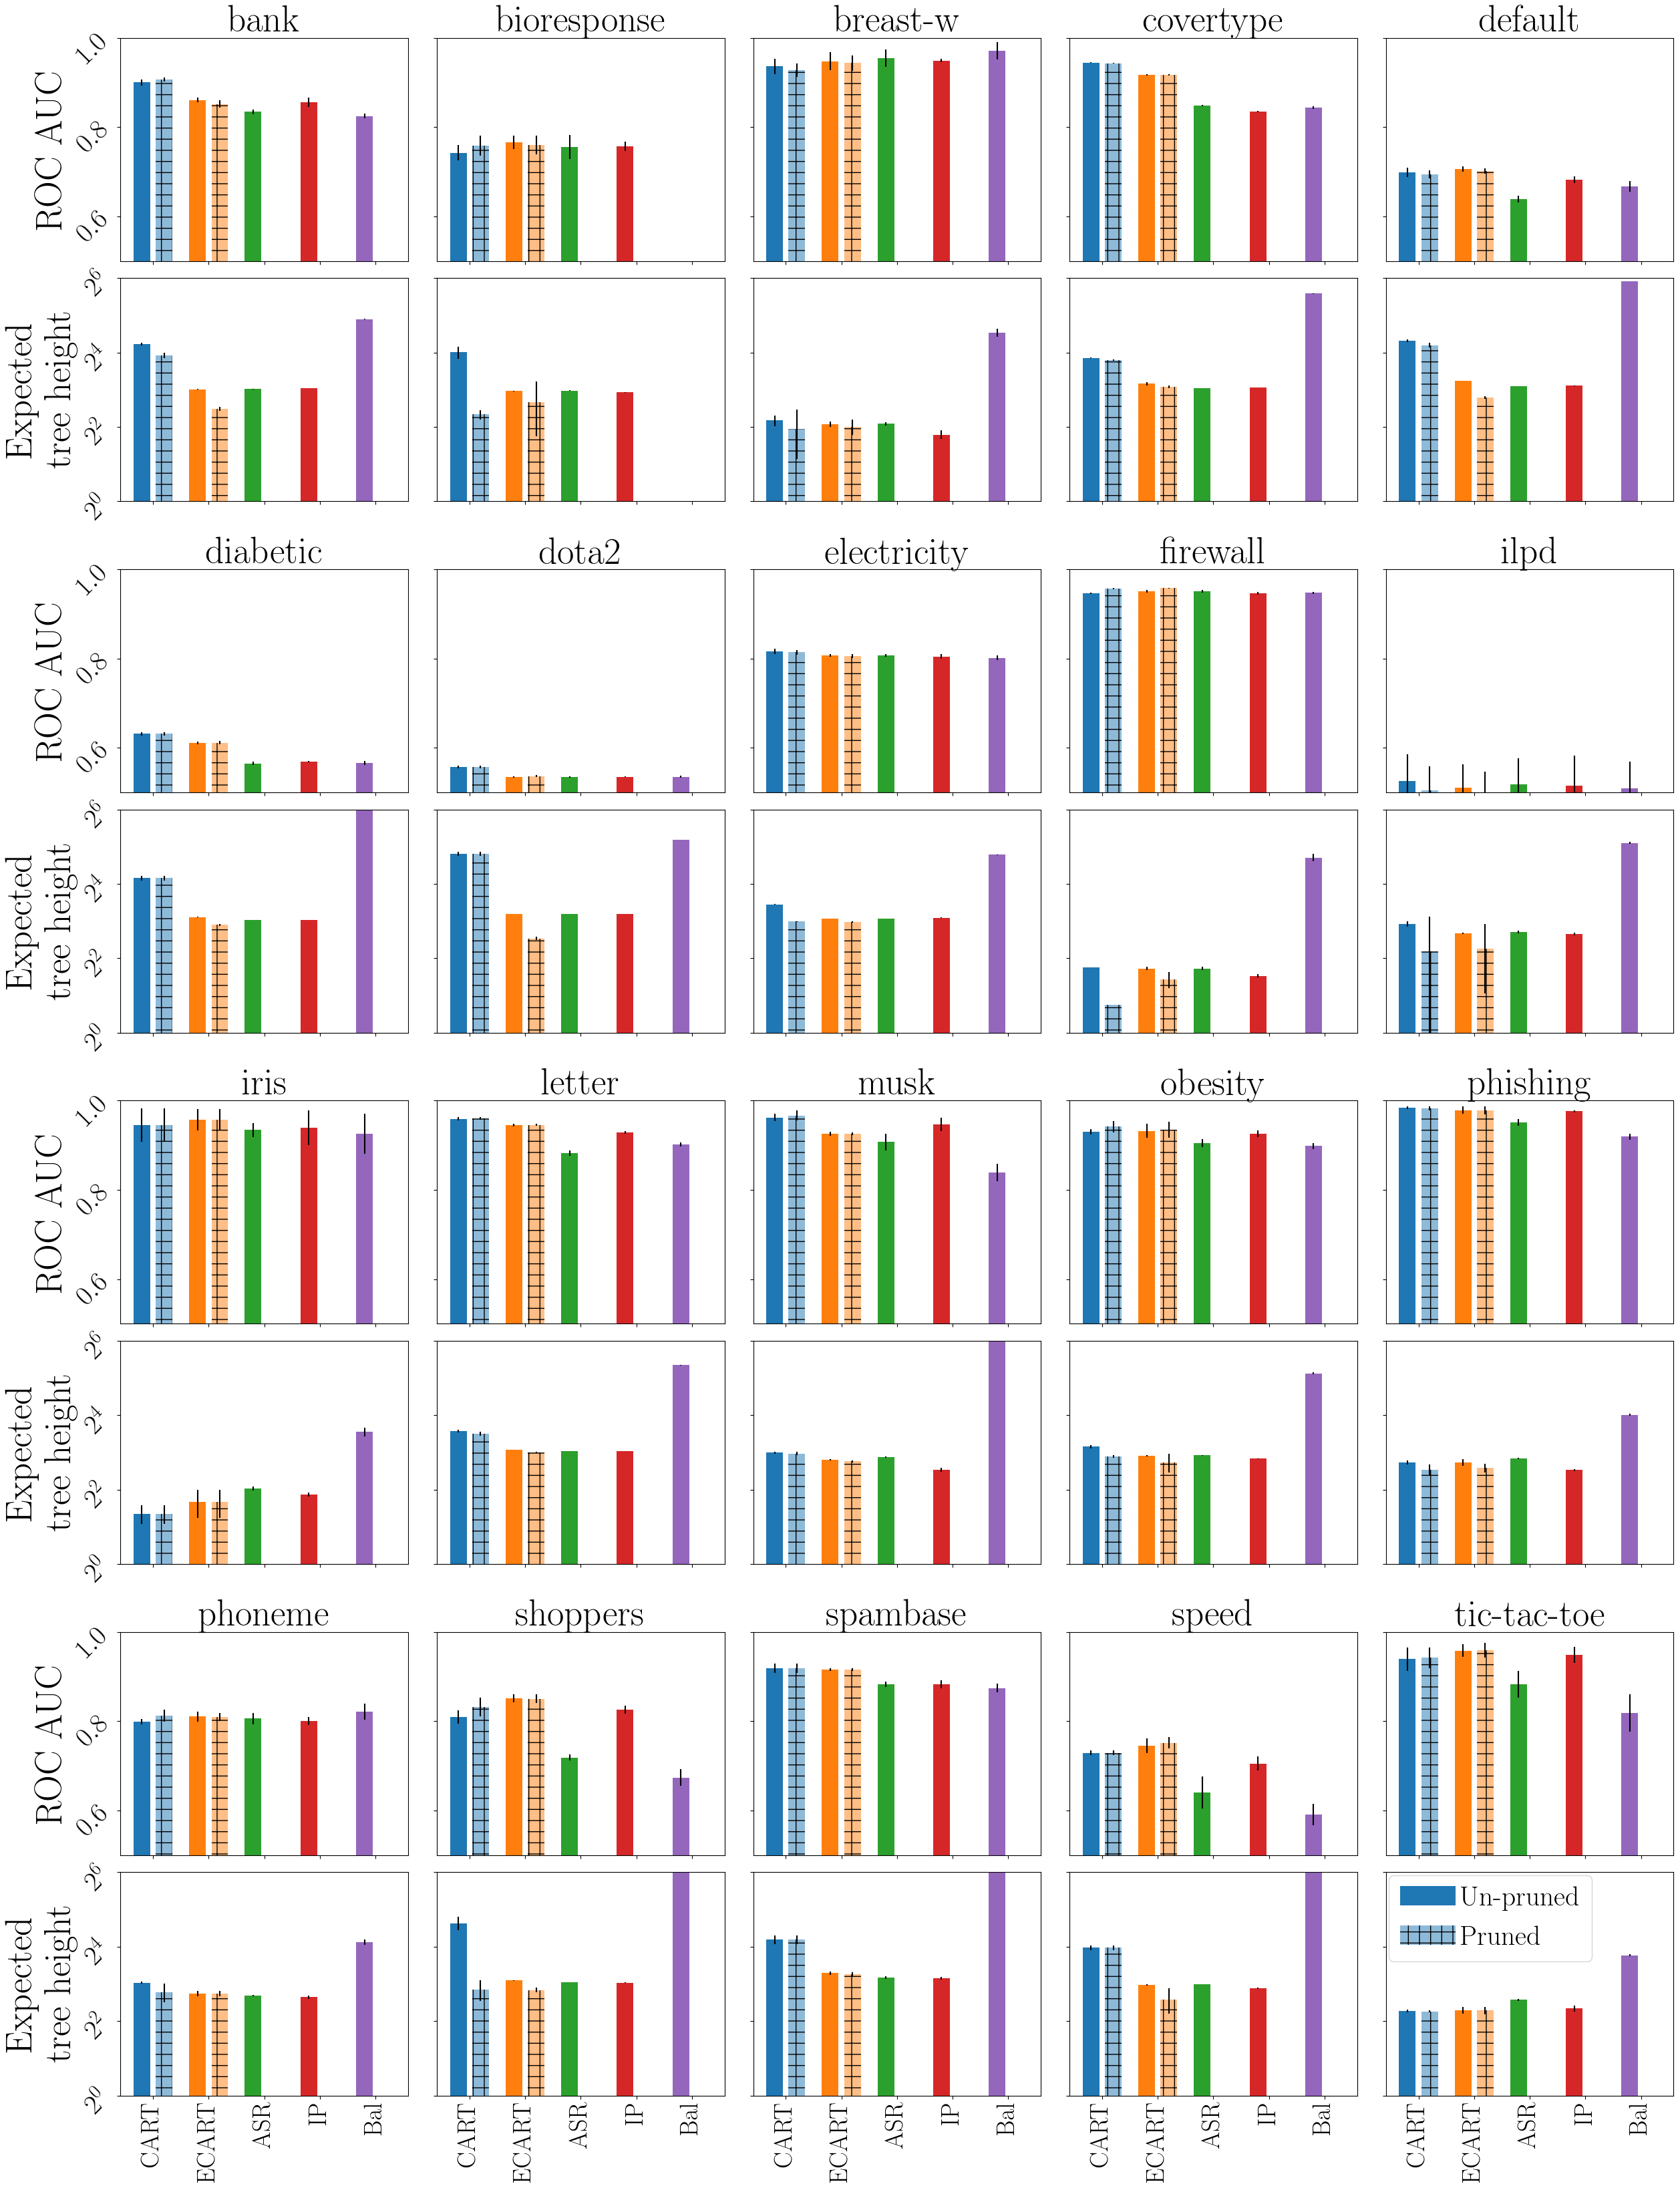

In [350]:
# method = 'C4.5'
method = 'CART'

datasets = df2.groupby('dataset').mean().index.to_list()
algs = ['{}'.format(method if costtype=='unit' else 'C'+method),
       'E{}'.format(method),
       'ASR', 
       'IP',
       'Bal']
def make_x_y(df2, metric, algs):
    df3 = df2.groupby('dataset').mean()
#     df3.fillna(0, inplace=True)
    df3_err = df2.groupby('dataset').std()
    df3_err.fillna(0, inplace=True)
    df3 = df3[metric][algs]
    df3_err = df3_err[metric][algs]
    return df3, df3_err


nrow = 4
ncol = len(datasets)//nrow
gridspec = dict(wspace=0.1, hspace=0.1, height_ratios=[1, 1, 0.15]*(nrow-1)+[1, 1])
fig, ax_lst = plt.subplots(nrow*3-1, ncol, figsize=(30, 10*nrow), sharex='col', gridspec_kw=gridspec)
for ax in ax_lst[[2,5,8]].flatten(): ax.set_visible(False) 
sz_font = 40
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
width = 0.3  # the width of the bars


metric = 'ROC AUC'
df3, df3_err = make_x_y(df2, metric, algs)
df3_, df3_err_ = make_x_y(df2, metric+' (ccp)', algs)
df3.fillna(0, inplace=True)
df3_.fillna(0, inplace=True)
for i,(dataset,ax) in enumerate(zip(datasets, ax_lst[[0,3,6,9]].flatten())):
    x = np.arange(len(df3.columns))  # the label locations

    y = df3.loc[dataset].to_numpy()
    yerr = df3_err.loc[dataset].to_numpy()
    rects = ax.bar(x-width/1.5, y, width, yerr=yerr, color=cycle[0:len(x)], label='Un-pruned')
    
    y = df3_.loc[dataset].to_numpy()
    yerr = df3_err_.loc[dataset].to_numpy()
    rects = ax.bar(x+width/1.5, y, width, yerr=yerr, color=cycle[0:len(x)], hatch='+', alpha=0.5, label='Pruned')
    
#     ax.set_title(dataset, fontdict={'fontsize': sz_font}, rotation=25)
    ax.set_title(dataset, fontdict={'fontsize': sz_font})
#     ax.tick_params(axis='x', labelsize=sz_font-10, labelrotation=270)
    ax.tick_params(axis='y', labelsize=sz_font-10, labelrotation=45)
    ax.set_ylim(0.5,1)
    
    if i%ncol == 0:
        ax.set_ylabel('{}'.format(metric), fontsize=sz_font)  
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])


# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/broken_axis.html

metric = 'Cost'
df3, df3_err = make_x_y(df2, metric, algs)
df3_, df3_err_ = make_x_y(df2, metric+' (ccp)', algs)
df3.fillna(1, inplace=True)
df3_.fillna(1, inplace=True)
d = .015

ylims = np.logspace(0, 12, num=13, base=2).astype(int)
idx_ylim = np.where(max(df3[algs[0]])*2 < ylims)[0][0]
ylim_sep = ylims[idx_ylim]
yticks = np.logspace(0, idx_ylim, num=idx_ylim+1, base=2).astype(int)
yticks = [t for i,t in enumerate(yticks) if i%2==0]

for i,(dataset,ax) in enumerate(zip(datasets, ax_lst[[1,4,7,10]].flatten())):
    x = np.arange(len(df3.columns))  # the label locations
    ax.set_yscale('log', base=2)

    y = df3.loc[dataset].to_numpy()
    yerr = df3_err.loc[dataset].to_numpy()
    rects = ax.bar(x-width/1.5, y, width, yerr=yerr, color=cycle[0:len(x)], label='Un-pruned')
    
    y = df3_.loc[dataset].to_numpy()
    yerr = df3_err_.loc[dataset].to_numpy()
    rects = ax.bar(x+width/1.5, y, width, yerr=yerr, color=cycle[0:len(x)], hatch='+', alpha=0.5, label='Pruned')
    
    ax.set_ylim(1,ylim_sep)
    ax.set_xticks(x)
    ax.set_xticklabels(df3.columns)
    ax.tick_params(axis='x', labelsize=sz_font-13, labelrotation=90)
    ax.tick_params(axis='y', labelsize=sz_font-10, labelrotation=45)
    
    if i%ncol == 0:
        ax.set_yticks(yticks)
        ax.set_ylabel('{}'.format('Expected \ntree height'), fontsize=sz_font)
#         ax.set_xlabel('Algorithms', fontsize=sz_font)
    else:
        ax.set_yticklabels([])
        

plt.legend(prop={'size': sz_font-10}, loc='best', handletextpad=0.2, borderaxespad=0.1)
fig.tight_layout()
# fig.savefig('comparison-{}-{}.pdf'.format(method.replace('.',''),costtype))
# tikzplotlib.save('comparison-{}-{}.tex'.format(method.replace('.',''),costtype))
code = tikzplotlib.get_tikz_code()

In [351]:
code_ = code

In [352]:
def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

def add_opt(code, key, opt, beg=False):
    idx = code.find(key)
    if beg:
        return code[:idx] + opt + code[idx:]
    return code[:idx+len(key)] + opt + code[idx+len(key):]

def add_opt_which(code, which, key, opt, beg=False):
    idx = find_nth(code, key, which)
    if beg:
        return code[:idx] + opt + code[idx:]
    return code[:idx+len(key)] + opt + code[idx+len(key):]


code = code_

key_gl = '\\begin{groupplot}['
key_per = 'nextgroupplot['

# code = code.replace('\nyticklabel style={rotate=45.0}', '')
code = code.replace('Expected', 'Expected\\\\')
code = code.replace('ROC', 'ROC\\\\')
code = code.replace('\ntick pos=both,', '')
# code = code.replace('ymin=1,', 'ymin=0,')
code = code.replace('\nyticklabel style={rotate=45.0},', '')
# code = code.replace('xticklabel style={rotate=315.0}', 'xticklabel style={rotate=270.0}')
code = code.replace('ultra thick', 'thick')

# code = add_opt(code, 'minor xticklabels', '%', beg=True)
# code = add_opt(code, 'scaled minor x ticks', '%', beg=True)

opt = '''
every axis title/.style={at={(0.5,1)},above,yshift=1pt,text depth=0pt},
width = 0.27\\textwidth, height = 0.23\\textwidth, 
group/horizontal sep=2pt, group/vertical sep=3pt,
yticklabels={,,}, 
xtick style={draw=none},
tickwidth=1pt,
tick label style={font=\\tiny},
label style={font=\\small},
'''
'''
ytick style={draw=none},
xtick style={draw=none},
'''
code = add_opt(code, key_gl, opt)


idx_auc = [3*ncol*i+1 for i in range(nrow)]
idx_cost = [3*ncol*i + ncol + 1 for i in range(nrow)]
idx_pad = [3*ncol*i + ncol*2 + 1 for i in range(nrow-1)]
idx_auc2 = [j for i in idx_auc for j in range(i,i+ncol)]
idx_cost2 = [j for i in idx_cost for j in range(i,i+ncol)]
idx_pad2 = [j for i in idx_pad for j in range(i,i+ncol)]

yticks_cost = ','.join([str(i) for i in yticks])

legend = '''legend pos=north west,
legend style={
  fill opacity=0.6,
  draw opacity=1,
  text opacity=1,
  at={(0,2)},
  legend columns=-1,
  draw=white!80!black
}, '''
code = add_opt_which(code, 1, key_per, legend)

for i in idx_auc:
    code = add_opt_which(code, i, key_per, 'ytick={0.4,0.6,0.8,1}, ')
for i in idx_cost2:
    idx = find_nth(code, key_per, i)
    idx2 = find_nth(code, key_per, i+1)
    code = code[:idx] + code[idx:idx2].replace(',0) rectangle', ',1) rectangle') + code[idx2:]
    code = add_opt_which(code, i, key_per, 'ytick={'+yticks_cost+'}, ')

# bioresponse missing result for BAL
i = idx_cost2[1]
idx = find_nth(code, key_per, i)
idx2 = find_nth(code, key_per, i+1)
code = code[:idx] + code[idx:idx2].replace('\\draw[draw=none,fill=color5', '%\\draw[draw=none,fill=color5') \
    + code[idx2:]

for i in idx_pad2: 
    code = add_opt_which(code, i, key_per, 'group/empty plot, height = 0.16\\textwidth,')

for i in idx_auc:
    code = add_opt_which(code, i, key_per, 
                         'ylabel style={align=center}, yticklabels={0.4,0.6,0.8,1}, ')
for i in idx_cost:
    code = add_opt_which(code, i, key_per, 
                         'ylabel style={align=center}, yticklabels={'+yticks_cost+'}, ')
    
# print(code)
with open('figs/comparison-{}-{}.tex'.format(method.replace('.',''),costtype), 'w') as fout:
    fout.write(code)

## Running time

In [151]:
running = df2.groupby('dataset').mean()['Runtime']
cols = running.columns
for c in cols[1:]:
    running[c] = running[c] / running[cols[0]]
running[cols[0]] = 1

running.mean(axis=0)

CC4.5    1.000000
EC4.5    3.680023
CCART    1.081030
ECART    3.542950
ASR      2.479761
IP       0.603995
Bal      3.357446
dtype: float64

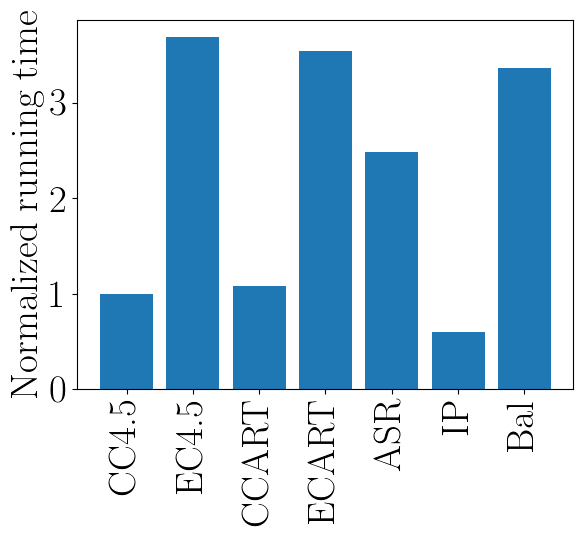

In [152]:
plt.bar(cols, running.mean(axis=0))
plt.tick_params(axis='x', labelsize=sz_font-12, labelrotation=90)
plt.tick_params(axis='y', labelsize=sz_font-12)
plt.xticks(cols)
plt.ylabel('Normalized running time', fontsize=sz_font-12)

code = tikzplotlib.get_tikz_code()

In [153]:
opt = 'width = 0.8\\textwidth, height = 0.4\\textwidth, xticklabels={' + ','.join(cols) + '}, xtick={' + ','.join([str(i) for i in range(len(cols))]) + '},' 
key = '\\begin{axis}['
idx = code.find(key)
code = code[:idx+len(key)] + opt + code[idx+len(key):]

with open('figs/running-time-{}-{}.tex'.format(method.replace('.',''),costtype), 'w') as fout:
    fout.write(code)

## Tex

In [78]:
print(df2.groupby('dataset').mean()['ROC AUC'].round(3).to_latex())
print(df2.groupby('dataset').mean()['Cost'].round(3).to_latex())
print(df2.groupby('dataset').mean()['Runtime'].round(1).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &   C4.5 &  EC4.5 &   CART &  ECART &    ASR &     IP &    Bal \\
dataset     &        &        &        &        &        &        &        \\
\midrule
bank        &  0.898 &  0.875 &  0.900 &  0.861 &  0.834 &  0.855 &  0.824 \\
bioresponse &  0.748 &  0.768 &  0.743 &  0.766 &  0.755 &  0.757 &    NaN \\
breast-w    &  0.943 &  0.948 &  0.936 &  0.948 &  0.955 &  0.949 &  0.971 \\
covertype   &  0.945 &  0.917 &  0.944 &  0.917 &  0.848 &  0.835 &  0.844 \\
default     &  0.700 &  0.718 &  0.699 &  0.706 &  0.638 &  0.681 &  0.668 \\
diabetic    &  0.632 &  0.612 &  0.631 &  0.610 &  0.565 &  0.569 &  0.565 \\
dota2       &  0.552 &  0.535 &  0.557 &  0.535 &  0.535 &  0.535 &  0.535 \\
electricity &  0.817 &  0.807 &  0.815 &  0.807 &  0.806 &  0.804 &  0.801 \\
firewall    &  0.946 &  0.950 &  0.946 &  0.950 &  0.950 &  0.946 &  0.947 \\
ilpd        &  0.529 &  0.528 &  0.525 &  0.511 &  0.518 &  0.515 &  0.510 \\
iris        &  0.945 &  0.957

In [351]:
def highlight_max_min(s, start, level=None):
    '''
    highlight the maximum in a Series yellow.
    # df.columns = list(map(lambda x: md[x], df.columns))
    # print(df.round(2).to_latex())
    '''
    if level is None:
        is_max = s == s[start:].max()
        is_min = s == s[start:].min()
        return ['color: green' if vmax else ('color: red' if vmin else '') \
                for vmax,vmin in zip(is_max,is_min)]
    else:
        ret = []
        for l in level:
            is_max = s[l] == s[l][start:].max()
            is_min = s[l] == s[l][start:].min()
            ret = ret + ['color: green' if vmax else ('color: red' if vmin else '') \
                    for vmax,vmin in zip(is_max,is_min)]
        return ret


h = partial(highlight_max_min, start=0, level=['ROC AUC', 'Cost'])
df2.style.apply(h, axis=1)

In [352]:
def latex_strip(tex):
    tex = tex[tex.find('midrule') + 8:]
    return tex[:tex.find('\\bottomrule')]

def isnum(s):
    try: 
        float(s)
        return True
    except ValueError:
        return False

def xval(line, start=1, use_max=True, prec=3):
    line = line.replace(' ','').strip('\\')
    f = max if use_max else min
    items = line.split('&')
    nums = [float(i) for i in items[start:] if isnum(i)] # drop non-numerical
    x = f(nums)
    newitems = ['\\bf{'+str(round(n,prec))+'}' if n==x else str(round(n,prec)) for n in nums]
    return '\t& '.join(items[:start] + newitems)

tex = df2['ROC AUC'].to_latex(escape=False)
print(tex)
print()
tex = latex_strip(tex)
tex = '\\\\\n'.join([xval(line,start=1,use_max=True,prec=3) for line in tex.split('\n') if line.strip() != ''])
print(tex)
print()

tex = df2['Cost'].to_latex(escape=False)
print(tex)
print()
tex = latex_strip(tex)
tex = '\\\\\n'.join([xval(line,start=1,use_max=False,prec=3) for line in tex.split('\n') if line.strip() != ''])
print(tex)

\begin{tabular}{lrrrrrrr}
\toprule
{} &      C4.5 &     CC4.5 &     EC4.5 &      CART &     CCART &     ECART &       ASR \\
dataset  &           &           &           &           &           &           &           \\
\midrule
iris     &  0.933333 &  0.933333 &  0.938889 &  0.933333 &  0.933333 &  0.938395 &  0.932346 \\
obesity  &  0.882707 &  0.882707 &  0.861682 &  0.881246 &  0.881246 &  0.864197 &  0.828230 \\
shoppers &  0.587790 &  0.587790 &  0.560693 &  0.587180 &  0.587180 &  0.562041 &  0.561894 \\
default  &  0.680898 &  0.680898 &  0.675584 &  0.677157 &  0.677157 &  0.647149 &  0.647749 \\
firewall &  0.917959 &  0.917959 &  0.917942 &  0.917959 &  0.917959 &  0.917942 &  0.917959 \\
dota     &  0.539365 &  0.539365 &  0.526418 &  0.540485 &  0.540485 &  0.526300 &  0.526345 \\
diab     &  0.598823 &  0.598823 &  0.570652 &  0.597501 &  0.597501 &  0.569781 &  0.569502 \\
poke     &  0.692298 &  0.692298 &  0.694119 &  0.691758 &  0.691758 &  0.696221 &  0.693099 \\
\b

# Post-doc tests

In [79]:
import scipy.stats as ss
import scikit_posthocs as sp
from Orange.evaluation import compute_CD, graph_ranks

In [307]:
# alpha='0.1'
alpha='0.05'
comm_cols = ['ASR', 'IP', 'Bal']

# full_cols = ['C4.5', 'EC4.5', 'CART', 'ECART', 'ASR', 'IP', 'Bal'] + \
#     ['pC4.5', 'pEC4.5', 'pCART', 'pECART', 'pASR', 'pIP', 'pBal']

# typ = 'unit-c45'
# cols = ['C4.5', 'EC4.5']
# pcols = ['p'+c for c in cols]

# typ = 'unit-cart'
# cols = ['CART', 'ECART']
# pcols = ['p'+c for c in cols]


full_cols = ['CC4.5', 'EC4.5', 'CCART', 'ECART', 'ASR', 'IP', 'Bal'] + \
    ['pCC4.5', 'pEC4.5', 'pCCART', 'pECART', 'pASR', 'pIP', 'pBal']

# typ = 'random-c45'
# cols = ['CC4.5', 'EC4.5']
# pcols = ['p'+c for c in cols]

typ = 'random-cart'
cols = ['CCART', 'ECART']
pcols = ['p'+c for c in cols]


cols = cols + comm_cols
baseline = len(cols) + 2 - 1 # pEC

In [308]:
def tikz_cd(code, height=0.35):
    code = code.replace('scale=0.5', 'scale=0.7')
#     code = code.replace('0.133333333333333', '0.2')
#     code = code.replace('0.166666666666667', '0.2')
#     code = code.replace('0.833333333333333', '0.8')
#     code = code.replace('0.866666666666667', '0.8')
    
    opt = '''
width = 0.6\\textwidth, height = {}\\textwidth,'''.format(height)
    key = '\\begin{axis}['
    idx = code.find(key)
    code = code[:idx+len(key)] + opt + code[idx+len(key):]
    for i in range(1,12+1,2):
        code = code.replace('{'+str(i)+'};', '{};')

    return code

## AUC

In [309]:
# data: dataset-by-alg
data = df2.groupby('dataset').mean()

In [310]:
auc = data[['ROC AUC', 'ROC AUC (ccp)']]
auc.columns = full_cols
auc = auc[cols + pcols]

In [311]:
ss.friedmanchisquare(*auc.values.T)

FriedmanchisquareResult(statistic=23.55834829443449, pvalue=0.0006295011219514167)

In [312]:
sp.posthoc_nemenyi_friedman(auc)

,CCART,ECART,ASR,IP,Bal,pCCART,pECART
CCART,1.000000,0.738735,0.001505,0.317933,0.223038,0.900000,0.717216
ECART,0.738735,1.000000,0.163405,0.900000,0.900000,0.652657,0.900000
ASR,0.001505,0.163405,1.000000,0.545064,0.653790,0.001000,0.176967
IP,0.317933,0.900000,0.545064,1.000000,0.900000,0.240902,0.900000
Bal,0.223038,0.900000,0.653790,0.900000,1.000000,0.162688,0.900000
pCCART,0.900000,0.652657,0.001000,0.240902,0.162688,1.000000,0.631139
pECART,0.717216,0.900000,0.176967,0.900000,0.900000,0.631139,1.000000


In [313]:
# https://edisciplinas.usp.br/pluginfile.php/4129451/mod_resource/content/1/model_selection_evaluation.pdf

In [314]:
# Calculating the ranks of the algorithms for each dataset. The value of p is multipled by -1
# because the rankdata method ranks from the smallest to the greatest performance values.
# Since we are considering AUC as our performance measure, we want larger values to be best ranked.
ranks = np.array([ss.rankdata(-p) for p in auc.values])
# Calculating the average ranks.
average_ranks = np.mean(ranks, axis=0)

In [315]:
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(auc.columns, average_ranks)))

CCART average rank: 2.875
ECART average rank: 3.875
ASR average rank: 5.575
IP average rank: 4.35
Bal average rank: 4.65
pCCART average rank: 2.775
pECART average rank: 3.9


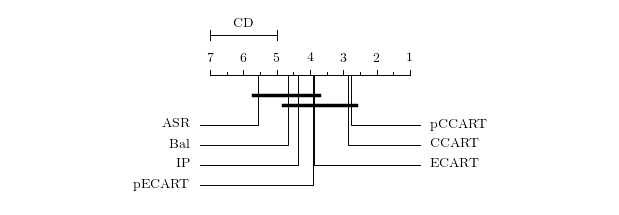

In [316]:
# This method computes the critical difference for Nemenyi test with alpha=0.1.
# For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
cd = compute_CD(average_ranks, 
                n=auc.shape[0],
                alpha=alpha,
                test='nemenyi')
# This method generates the plot.
graph_ranks(average_ranks,
            names=auc.columns,
            cd=cd,
            width=6,
            textspace=2,
            reverse=True,
            filename='figs/cd-nemenyi-auc-{}-{}.pdf'.format(typ,alpha.replace('.','')))
# plt.show()
code = tikzplotlib.get_tikz_code()
code = tikz_cd(code)
with open('figs/cd-nemenyi-auc-{}-{}.tex'.format(typ,alpha.replace('.','')), 'w') as fout:
    fout.write(code)

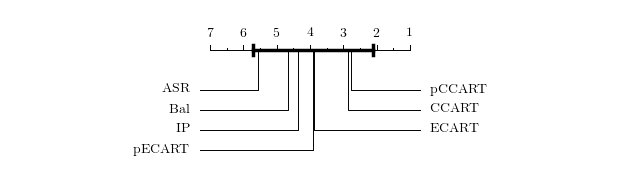

In [317]:
# This method computes the critical difference for Bonferroni-Dunn test with alpha=0.05.
# For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
cd = compute_CD(average_ranks,
                n=auc.shape[0],
                alpha=alpha,
                test='bonferroni-dunn')
# This method generates the plot.
graph_ranks(average_ranks,
            names=auc.columns,
            cd=cd,
            cdmethod=baseline,
            width=6,
            textspace=2,            
            reverse=True,
            filename='figs/cd-bonferroni-auc-{}-{}.pdf'.format(typ,alpha.replace('.','')))
# plt.show()
code = tikzplotlib.get_tikz_code()
code = tikz_cd(code)
with open('figs/cd-bonferroni-auc-{}-{}.tex'.format(typ,alpha.replace('.','')), 'w') as fout:
    fout.write(code)

## Cost

In [318]:
data = df2.groupby('dataset').mean()

In [319]:
cost = data[['Cost', 'Cost (ccp)']]
cost.columns = full_cols
cost = cost[cols + pcols]

In [320]:
ss.friedmanchisquare(*cost.values.T)

FriedmanchisquareResult(statistic=105.73321396598035, pvalue=1.5925137965963477e-20)

In [321]:
sp.posthoc_nemenyi_friedman(cost)

,CCART,ECART,ASR,IP,Bal,pCCART,pECART
CCART,1.000000,0.011844,0.001000,0.001000,0.900000,0.738735,0.001000
ECART,0.011844,1.000000,0.176967,0.115802,0.001000,0.455921,0.150125
ASR,0.001000,0.176967,1.000000,0.900000,0.001000,0.001000,0.900000
IP,0.001000,0.115802,0.900000,1.000000,0.001000,0.001000,0.900000
Bal,0.900000,0.001000,0.001000,0.001000,1.000000,0.216029,0.001000
pCCART,0.738735,0.455921,0.001000,0.001000,0.216029,1.000000,0.001000
pECART,0.001000,0.150125,0.900000,0.900000,0.001000,0.001000,1.000000


In [322]:
# https://edisciplinas.usp.br/pluginfile.php/4129451/mod_resource/content/1/model_selection_evaluation.pdf

In [323]:
# Calculating the ranks of the algorithms for each dataset. The value of p is multipled by -1
# because the rankdata method ranks from the smallest to the greatest performance values.
# Since we are considering AUC as our performance measure, we want larger values to be best ranked.
ranks = np.array([ss.rankdata(p) for p in cost.values])
# Calculating the average ranks.
average_ranks = np.mean(ranks, axis=0)

In [324]:
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(cost.columns, average_ranks)))

CCART average rank: 6.125
ECART average rank: 3.8
ASR average rank: 2.125
IP average rank: 2.0
Bal average rank: 6.75
pCCART average rank: 5.125
pECART average rank: 2.075


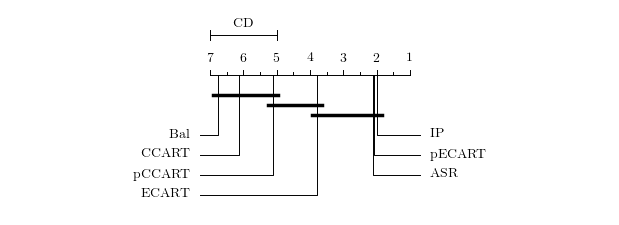

In [325]:
# This method computes the critical difference for Nemenyi test with alpha=0.1.
# For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
cd = compute_CD(average_ranks, 
                n=cost.shape[0],
                alpha=alpha,
                test='nemenyi')
# This method generates the plot.
graph_ranks(average_ranks,
            names=cost.columns,
            cd=cd,
            width=6,
            textspace=2,
            reverse=True,
            filename='figs/cd-nemenyi-cost-{}-{}.pdf'.format(typ,alpha.replace('.','')))
# plt.show()
code = tikzplotlib.get_tikz_code()
code = tikz_cd(code)
with open('figs/cd-nemenyi-cost-{}-{}.tex'.format(typ,alpha.replace('.','')), 'w') as fout:
    fout.write(code)

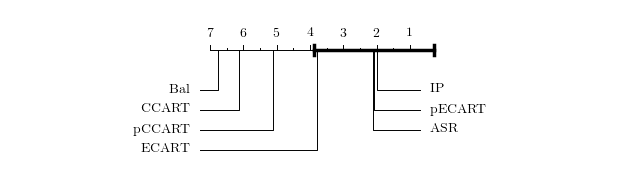

In [326]:
# This method computes the critical difference for Bonferroni-Dunn test with alpha=0.05.
# For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
cd = compute_CD(average_ranks,
                n=cost.shape[0],
                alpha=alpha,
                test='bonferroni-dunn')
# This method generates the plot.
graph_ranks(average_ranks,
            names=cost.columns,
            cd=cd,
            cdmethod=baseline,
            width=6,
            textspace=2,
            reverse=True,
            filename='figs/cd-bonferroni-cost-{}-{}.pdf'.format(typ,alpha.replace('.','')))
# plt.show()
code = tikzplotlib.get_tikz_code()
code = tikz_cd(code)
with open('figs/cd-bonferroni-cost-{}-{}.tex'.format(typ,alpha.replace('.','')), 'w') as fout:
    fout.write(code)